### Pandas (Python Data Anlysis Library)

pandas는 파이썬에서 사용하는 데이터분석 라이브러리로 행과 열로 이루어진 데이터 객체를 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터를 처리하는데 매우 유용한 도구다.

pandas에서는 기본적으로 정의 되어 있는 1차원 배열인 `Series`와 2차원 배열인 `DataFrame`을 사용한다.

이 자료구조들은 빅데이터분석에 있어 높은 수준의 성능을 보여준다.

* pandas문서 : http://pandas.pydata.org/pandas-docs/stable/index.html
* 자료구조   : http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [54]:
# 데이터분석 주요라이브러리
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(\
              fname='c:/windows/fonts/NanumGothicCoding.ttf').get_name()
# rc('font', familt=font_name)
# rc('axes', unicode_minus=False)  # minus처리

FileNotFoundError: [Errno 2] No such file or directory: 'c:/windows/fonts/NanumGothicCoding.ttf'

In [4]:
pd.show_versions() # full package version
pd.__version__     # pd version


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
matplotli

'0.25.1'

### 1. Series

In [8]:
# 1.Series 자료생성 (1) - 기본
# 인덱스와 값을 가지는 1차원 배열
# 값들의 리스트를 전달해서 생성한다. 인덱스는 자동적으로 기본적으로 정의되는
# 정수 인덱스를 사용한다. 단, 인덱스를 정의하지 않으면 0부터 순번으로 부여
# 된다.

ser1 = pd.Series([1,3,5,np.nan,6,8])
print(ser1)
print(type(ser1))

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
<class 'pandas.core.series.Series'>


In [14]:
# 1.Series 자료생성 (2) - 인덱스정의
# 기본숫자인덱스와 문자 인덱스

ser2 = pd.Series([3,6,9,12])
print(ser2)
ser2 = pd.Series([3,6,9,12], index=['2019', '2018', '2017', '2016'])
ser2

0     3
1     6
2     9
3    12
dtype: int64


2019     3
2018     6
2017     9
2016    12
dtype: int64

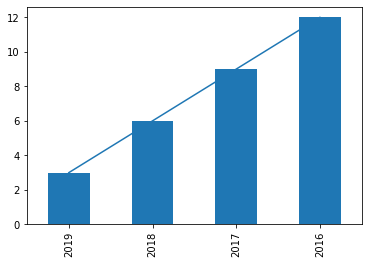

In [17]:
ser2.plot()
ser2.plot(kind='bar')
plt.show()

<class 'dict'>
소향     5000
손흥민    7000
홍길동    6500
홍길순    8000
dtype: int64


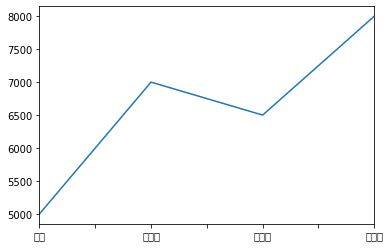

In [26]:
# 1.Series 자료생성 (3) - key와 인덱스정의
# dictionary자료형으로 키=인덱스, 값=요소
emp = {'소향':5000, '손흥민':7000, '홍길동':6500, '홍길순':8000}
print(type(emp))

ser3 = pd.Series(emp)
print(ser3)
ser3.plot()
plt.show()

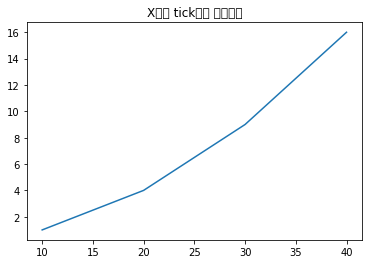

In [29]:
plt.title('X축의 tick위치 표시하기')
plt.plot([10,20,30,40], [1,4,9,16])
plt.show()

# show()명령은 시각화 명령을 실제도 차트로 랜더링하고 마우스의 동작을 기다
# 리라는 명령이다. jupyter notebook에서는 셀단위로 플롯명령을 자동으로 랜
# 더링해주기 때문에 show명령은 필요 없지만 일반적 파이썬 인터프리터로 가동
# 되는 경우를 대비해서 항상 마지막에 실행하도록 한다.

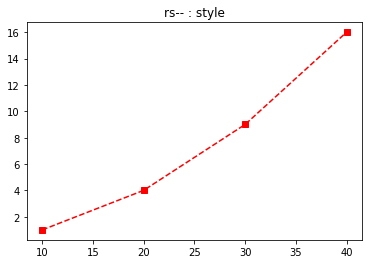

In [37]:
# 스타일지정(fmt옵션)
# 스타일 문자열은 색상, 마커, 선종류 순서로 지정
# 만약에 이중에 일부값이 생략된돠면 기본값이 적용된다.
#plt.plot?
plt.title('rs-- : style')
plt.plot([10,20,30,40], [1,4,9,16], 'rs--')
plt.show()

### 그래프범위지정

그래프를 보면 몇몇점들을 그래프 범위 경계선에 있어 잘 보이지 않는 경우가 있을 수 있다. 이럴 경우 그래프의 범위를 수동으로 지정할 경우 xlim(), ylim()함수를 사용한다. 

이 명령은 그래프의 범위가 되는 x축, y축의 최소값과 최대값을 지정한다.

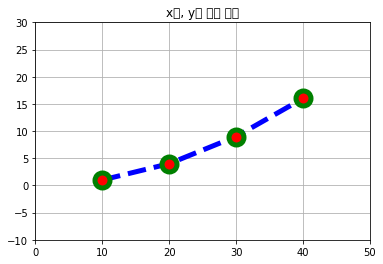

In [53]:
plt.title('x축, y축 범위 설정')
plt.plot([10,20,30,40], [1,4,9,16], c='b', lw=5, ls='--', marker='o',
           ms=15, mec='g',mew=5, mfc='r')

plt.grid(True)
plt.xlim(0,50)
plt.ylim(-10, 30)
plt.show()

### 틱(tick)설정

그래프에서 축상의 위치표시 지점을 tick이라고 한다. 이 틱에 쓰어진 숫자 혹은 글자를 틱라벨(Tick Label)이리고 한다. 틱의 위치나 틱라벨은 Matplotlib에서 자동으로 정해주지만 수동으로 설정하고자 할 경우에는 xticks, yticks함수를 사용한다.

In [ ]:
# x,y의 틱라벨 설정하기
X = np.linspace()